In [1]:
import xarray as xr
import matplotlib.pyplot as plt
import matplotlib.animation as animation
import numpy as np
%config InlineBackend.figure_format='retina'

import sys
sys.path.append('/nethome/4302001/diffusion-hydro-mod/tools/')
import ACC_tools

In [2]:
topography_coarse = ACC_tools.read_binary_field("/nethome/4302001/diffusion-hydro-mod/ACC_mitgcm_config/GCM/reentrant_coarse/input_ridge_1y_tracer_locb/bathy.50km.bin",
                                                (40,20),
                                                dtype=np.dtype('float32'))

# Creating movies

In [3]:
trajdir = '/data/oceanparcels/output_data/data_Daan/project_diffusion/trelease/'

In [4]:
experiment_files = {
    "fine_advection" : "trelease_fine_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarsened_tave_advection" : "trelease_coarsened_tave_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C0.3" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C0.3_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C1" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C1_p100000_dt40m.nc",
    "coarsened_tave_EM_Le_Sommer_C3" : "trelease_coarsened_tave_locb_EM_Le_Sommer_C3_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K1500" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K5000" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarsened_tave_EM_Redi_smallslope_K15000" : "trelease_coarsened_tave_locb_EM_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K1500" : "trelease_coarsened_tave_locb_Markov1_K1500_Tl1728000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K5000" : "trelease_coarsened_tave_locb_Markov1_K5000_Tl1728000_p100000_dt40m.nc",
    "coarsened_tave_Markov1_K15000" : "trelease_coarsened_tave_locb_Markov1_K15000_Tl1728000_p100000_dt40m.nc",
    "coarse_advection" : "trelease_coarse_locb_advection_None_K15000_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C0.3": "trelease_coarse_locb_EM_Le_Sommer_C0.3_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C1":   "trelease_coarse_locb_EM_Le_Sommer_C1_p100000_dt40m.nc",
    "coarse_EM_Le_Sommer_C3":   "trelease_coarse_locb_EM_Le_Sommer_C3_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K1500": "trelease_coarse_locb_EM_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K5000": "trelease_coarse_locb_EM_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarse_EM_Redi_smallslope_K15000": "trelease_coarse_locb_EM_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K1500": "trelease_coarse_locb_M1_Redi_smallslope_K1500_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K5000": "trelease_coarse_locb_M1_Redi_smallslope_K5000_p100000_dt40m.nc",
    "coarse_M1_Redi_smallslope_K15000": "trelease_coarse_locb_M1_Redi_smallslope_K15000_p100000_dt40m.nc",
    "coarse_Markov1_K1500": "trelease_coarse_locb_Markov1_K1500_Tl1728000_p100000_dt40m.nc",
    "coarse_Markov1_K5000": "trelease_coarse_locb_Markov1_K5000_Tl1728000_p100000_dt40m.nc",
    "coarse_Markov1_K15000": "trelease_coarse_locb_Markov1_K15000_Tl1728000_p100000_dt40m.nc",
}

In [5]:
experiments = dict()
for experiment, filename in experiment_files.items():
    experiments[experiment] = xr.open_dataset(trajdir + str(filename), decode_times=False)

In [6]:
ds_field_fine = xr.open_dataset('/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_fine_1y_locb.nc')
ds_field_coarsened = xr.open_dataset("/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_fine_1y_locb_coarsened_tave_fixtemp.nc")
ds_field_coarse = xr.open_dataset('/data/oceanparcels/input_data/MITgcm/ACC_channel/ACC_ridge_coarse_1y_locb_with_derivative.nc')

In [7]:
lowerbound = -20000
upperbound = 0

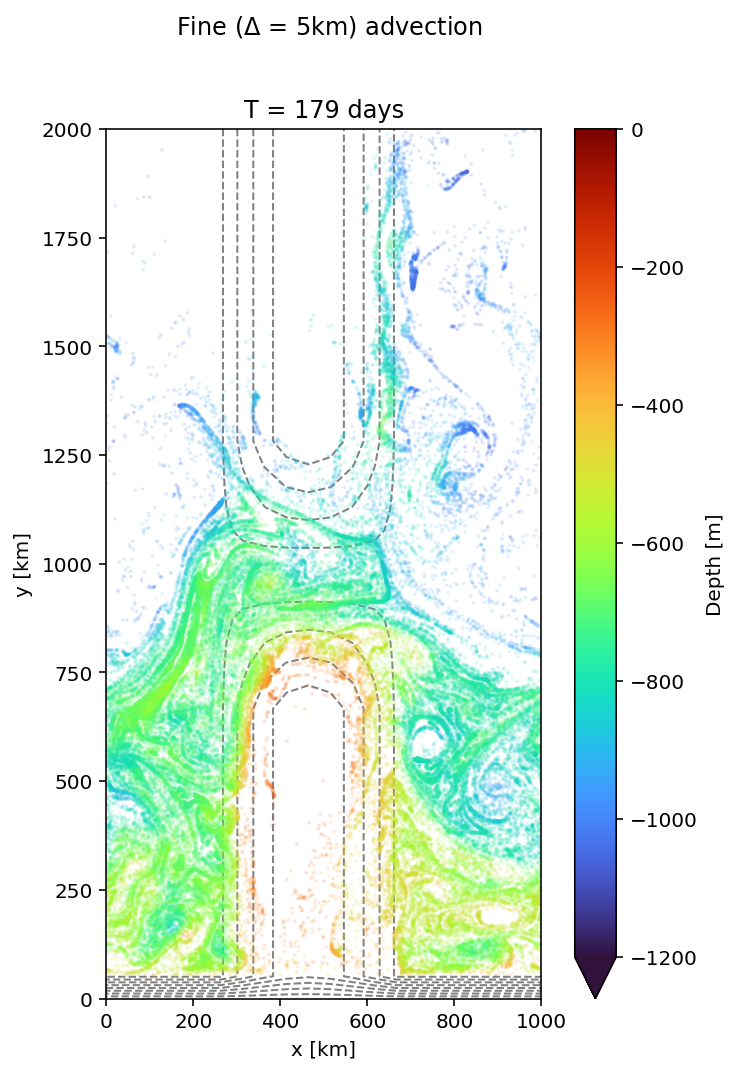

In [8]:
for plotds, title, savename in zip([experiments["fine_advection"]], 
                                     [f"Fine ($\Delta$ = 5km) advection"],
                                     ["fine_advection"]):
    fig, ax = plt.subplots(figsize=(6,8))
    step=0
    scat = ax.scatter(1/1000*(plotds.isel(obs=step).lon.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      1/1000*(plotds.isel(obs=step).lat.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      c = plotds.isel(obs=step).z.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
    bathy = ax.contour(np.linspace(-1000, 4000, 100), 
                        np.linspace(0, 2000, 40),
                        np.tile(topography_coarse, 5), 
                        levels=np.arange(-3900, 0, 500),
                        colors=['grey'],
                        linestyles='dashed',
                        linewidths=1,
                        zorder=-1)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 2000)
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_aspect(1)
    fig.suptitle(title)
    head = ax.set_title(f"T = {0} days")
    cbar = plt.colorbar(scat, extend='min', label='Depth [m]')
    cbar.set_alpha(1)
    cbar.draw_all()
    
    def animate(t):
        scat.set_offsets(np.vstack((1/1000*(plotds.isel(obs=t).lon.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)), 
                                    1/1000*(plotds.isel(obs=t).lat.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)))).transpose())
        head.set_text(f"T = {t} days")
        scat.set_array(plotds.isel(obs=t).z.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound))
        return scat,

    anim = animation.FuncAnimation(fig, 
                                   animate, 
                                   frames=180,
                                   blit=True)
    anim.save(f'out/animation_{savename}.mp4', fps=10, metadata={'artist':'Daan', 'title':savename}, bitrate=-1, dpi=250, codec="libx264", extra_args=['-pix_fmt', 'yuv420p'])

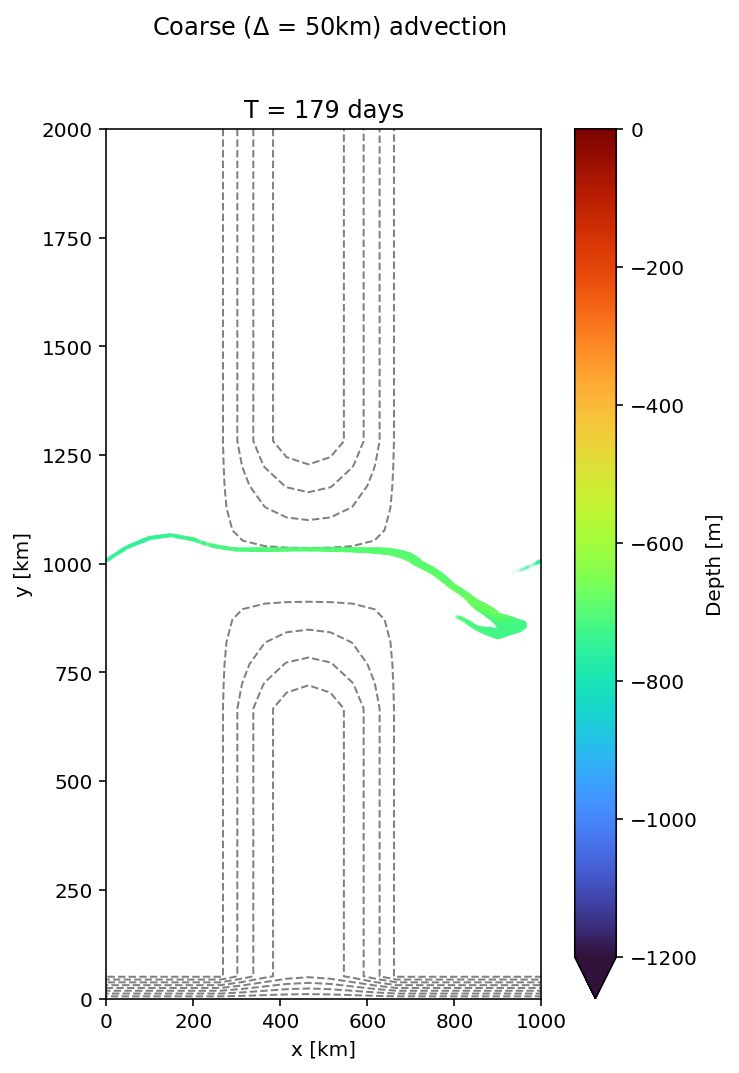

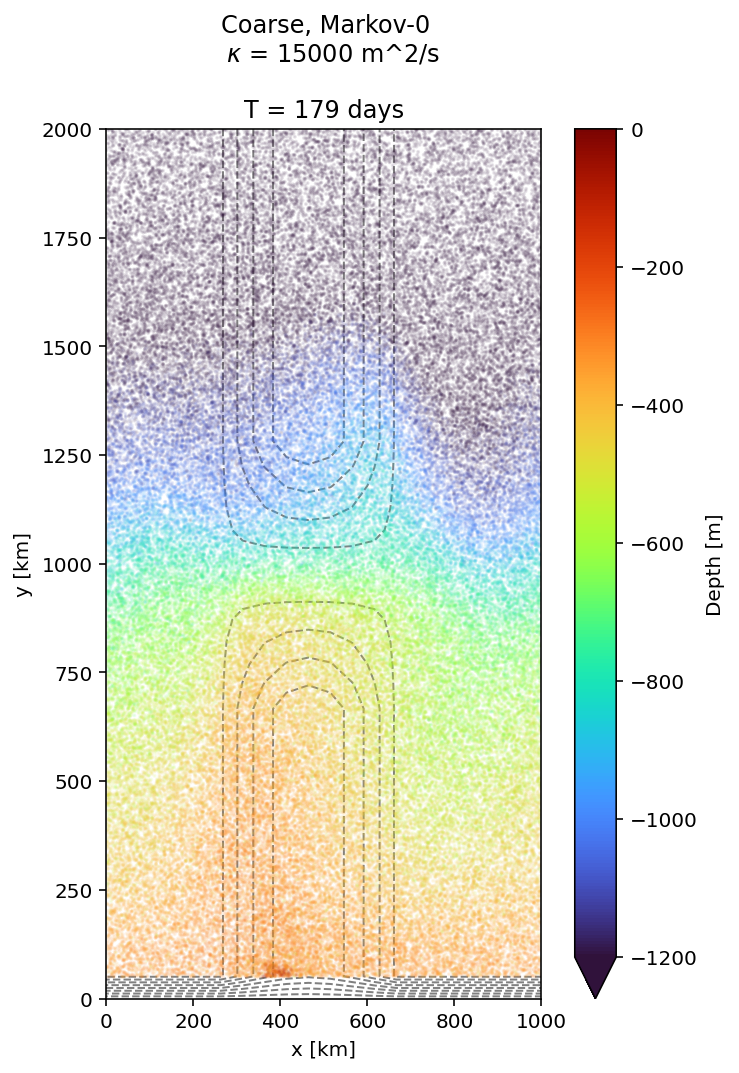

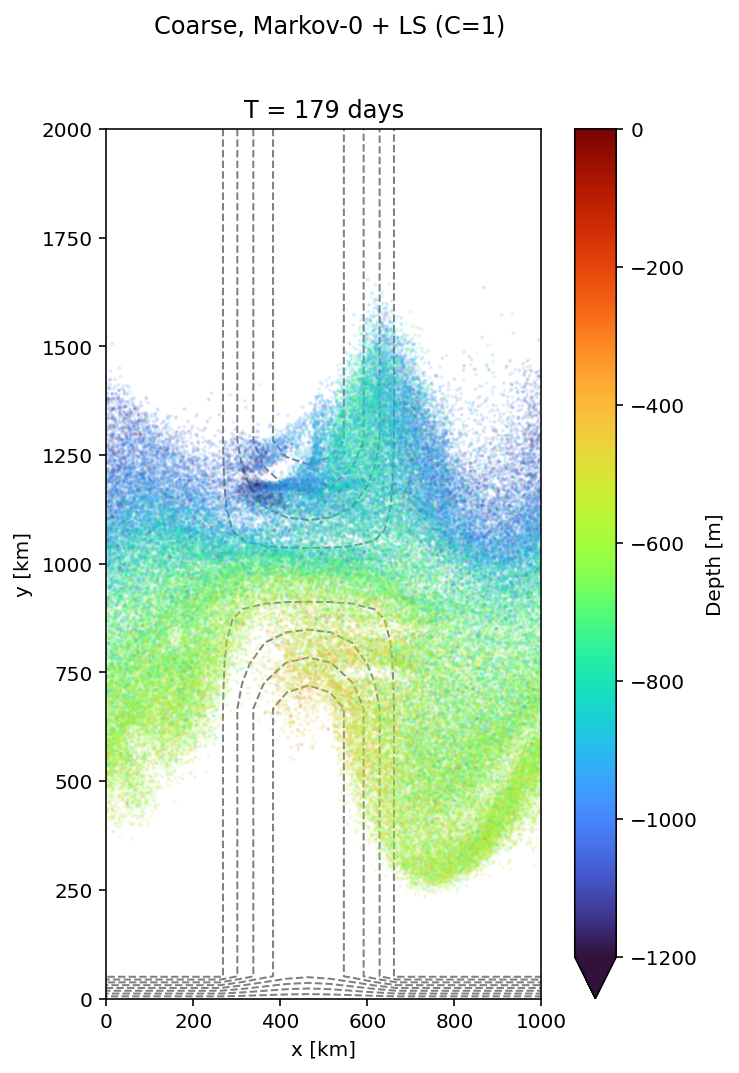

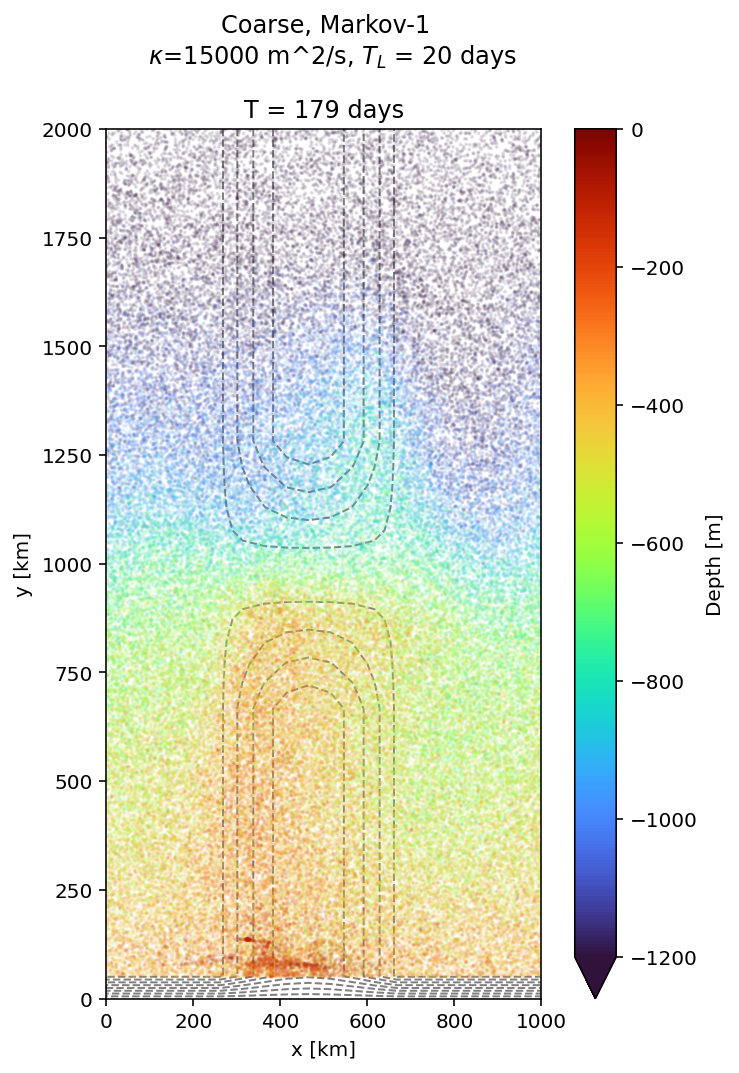

In [10]:
for plotds, title, savename in zip([experiments["coarse_advection"], experiments["coarse_EM_Redi_smallslope_K15000"], experiments["coarse_EM_Le_Sommer_C1"], experiments["coarse_Markov1_K15000"]], 
                                   [f"Coarse ($\Delta$ = 50km) advection", f"Coarse, Markov-0 \n $\kappa$ = 15000 m^2/s", f"Coarse, Markov-0 + LS (C=1)", f"Coarse, Markov-1 \n $\kappa$=15000 m^2/s, $T_L$ = 20 days"],
                                   ["coarse_advection", "coarse_redi_k15000", "coarse_le_sommer_c1", "coarse_markov_k15000"]):
    fig, ax = plt.subplots(figsize=(6,8))
    step=0
    scat = ax.scatter(1/1000*(plotds.isel(obs=step).lon.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      1/1000*(plotds.isel(obs=step).lat.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      c = plotds.isel(obs=step).z.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
    bathy = ax.contour(np.linspace(-1000, 4000, 100), 
                        np.linspace(0, 2000, 40),
                        np.tile(topography_coarse, 5), 
                        levels=np.arange(-3900, 0, 500),
                        colors=['grey'],
                        linestyles='dashed',
                        linewidths=1,
                        zorder=-1)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 2000)
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_aspect(1)
    fig.suptitle(title)
    head = ax.set_title(f"T = {0} days")
    cbar = plt.colorbar(scat, extend='min', label='Depth [m]')
    cbar.set_alpha(1)
    cbar.draw_all()
    def animate(t):
        scat.set_offsets(np.vstack((1/1000*(plotds.isel(obs=t).lon.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)), 
                                    1/1000*(plotds.isel(obs=t).lat.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)))).transpose())
        head.set_text(f"T = {t} days")
        scat.set_array(plotds.isel(obs=t).z.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound))
        return scat,

    anim = animation.FuncAnimation(fig, 
                                   animate, 
                                   frames=180,
                                   blit=True)
    anim.save(f'out/animation_{savename}.mp4', fps=10, metadata={'artist':'Daan', 'title':savename}, bitrate=-1, dpi=250, codec="libx264", extra_args=['-pix_fmt', 'yuv420p'])

In [ ]:
for plotds, title, savename in zip([experiments["coarsened_tave_advection"], experiments["coarsened_tave_EM_Redi_smallslope_K15000"], experiments["coarsened_tave_EM_Le_Sommer_C1"], experiments["coarsened_tave_Markov1_K15000"]], 
                                   [f"Coarsened ($\Delta$ = 50km) advection", f"Coarsened, Markov-0 \n $\kappa$ = 15000 m^2/s", f"Coarsened, Markov-0 + LS (C=1)", f"Coarsened, Markov-1 \n $\kappa$=15000 m^2/s, $T_L$ = 20 days"],
                                   ["coarsened_advection", "coarsened_redi_k15000", "coarsened_le_sommer_c1", "coarsened_markov_k15000"]):
    fig, ax = plt.subplots(figsize=(6,8))
    step=0
    scat = ax.scatter(1/1000*(plotds.isel(obs=step).lon.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      1/1000*(plotds.isel(obs=step).lat.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound)), 
                      c = plotds.isel(obs=step).z.where(plotds.isel(obs=step).z < upperbound).where(plotds.isel(obs=step).z > lowerbound),
                      vmin=-1200, vmax=0, s=1, cmap='turbo', alpha=0.1)
    bathy = ax.contour(np.linspace(-1000, 4000, 100), 
                        np.linspace(0, 2000, 40),
                        np.tile(topography_coarse, 5), 
                        levels=np.arange(-3900, 0, 500),
                        colors=['grey'],
                        linestyles='dashed',
                        linewidths=1,
                        zorder=-1)
    ax.set_xlim(0, 1000)
    ax.set_ylim(0, 2000)
    ax.set_xlabel('x [km]')
    ax.set_ylabel('y [km]')
    ax.set_aspect(1)
    fig.suptitle(title)
    head = ax.set_title(f"T = {0} days")
    cbar = plt.colorbar(scat, extend='min', label='Depth [m]')
    cbar.set_alpha(1)
    cbar.draw_all()
    def animate(t):
        scat.set_offsets(np.vstack((1/1000*(plotds.isel(obs=t).lon.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)), 
                                    1/1000*(plotds.isel(obs=t).lat.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound)))).transpose())
        head.set_text(f"T = {t} days")
        scat.set_array(plotds.isel(obs=t).z.where(plotds.isel(obs=t).z < upperbound).where(plotds.isel(obs=t).z > lowerbound))
        return scat,

    anim = animation.FuncAnimation(fig, 
                                   animate, 
                                   frames=180,
                                   blit=True)
    anim.save(f'out/animation_{savename}.mp4', fps=10, metadata={'artist':'Daan', 'title':savename}, bitrate=-1, dpi=250, codec="libx264", extra_args=['-pix_fmt', 'yuv420p'])